In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importación de datos

In [2]:
import pandas as pd

In [3]:
import os
os.getcwd()
os.chdir('C:\\Users\\caleb.terrel\\Desktop\\2-Python_para_analisis_exploratorio_de_datos\\datasets')
os.getcwd()

'C:\\Users\\caleb.terrel\\Desktop\\2-Python_para_analisis_exploratorio_de_datos\\codigos python'

'C:\\Users\\caleb.terrel\\Desktop\\2-Python_para_analisis_exploratorio_de_datos\\datasets'

In [4]:
compra = pd.read_csv('DS_Compra.csv')
compra.head()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


In [5]:
compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           400 non-null    int64  
 1   SEXO         400 non-null    object 
 2   EDAD         387 non-null    float64
 3   INGRESOS     400 non-null    int64  
 4   ESTADOCIVIL  392 non-null    object 
 5   FLAG_COMPRA  400 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ KB


In [6]:
compra.describe(include = "all")

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
count,400.000000,400,387.000000,400.000000,392,400.000000
unique,NaN,2,NaN,NaN,3,NaN
top,NaN,F,NaN,NaN,S,NaN
freq,NaN,204,NaN,NaN,214,NaN
mean,10200.500000,NaN,37.589147,6476.500000,NaN,0.357500
std,115.614301,NaN,10.523312,7705.031897,NaN,0.479864
min,10001.000000,NaN,18.000000,1200.000000,NaN,0.000000
25%,10100.750000,NaN,29.000000,3500.000000,NaN,0.000000
50%,10200.500000,NaN,37.000000,5800.000000,NaN,0.000000
75%,10300.250000,NaN,46.000000,7300.000000,NaN,1.000000


In [7]:
compra['SEXO'].value_counts()
compra['ESTADOCIVIL'].value_counts()
compra['FLAG_COMPRA'].value_counts()

F    204
M    196
Name: SEXO, dtype: int64

S    214
C    125
D     53
Name: ESTADOCIVIL, dtype: int64

0    257
1    143
Name: FLAG_COMPRA, dtype: int64

In [8]:
compra['SEXO'].value_counts(normalize=True)
compra['ESTADOCIVIL'].value_counts(normalize=True)
compra['FLAG_COMPRA'].value_counts(normalize=True)

F    0.51
M    0.49
Name: SEXO, dtype: float64

S    0.545918
C    0.318878
D    0.135204
Name: ESTADOCIVIL, dtype: float64

0    0.6425
1    0.3575
Name: FLAG_COMPRA, dtype: float64

# Gráficos estadísticos

## Distribución: histograma

In [9]:
import matplotlib
print(matplotlib.__version__)

3.3.4


In [10]:
import seaborn
print(seaborn.__version__)

0.11.1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

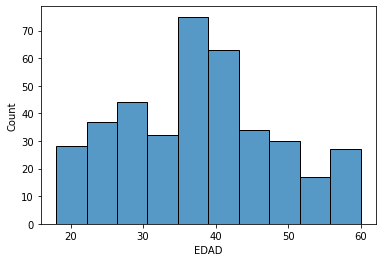

In [12]:
sb.histplot(data = compra, x = 'EDAD')

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

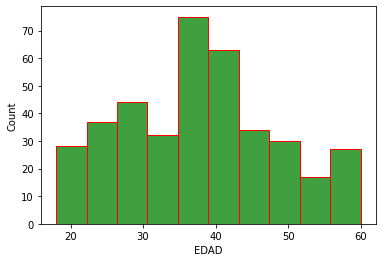

In [13]:
sb.histplot(data = compra, x = 'EDAD', edgecolor = 'red', color = 'green')

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

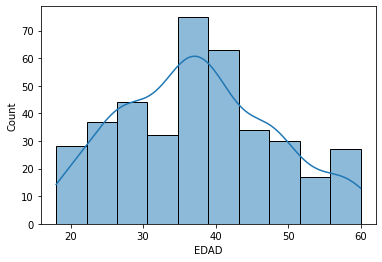

In [14]:
sb.histplot(data = compra, x = 'EDAD', kde = True)

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

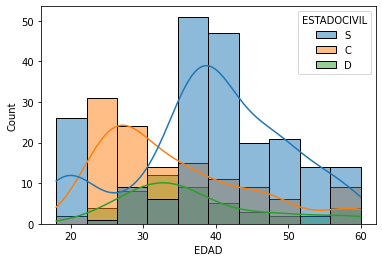

In [15]:
sb.histplot(data = compra, x = 'EDAD', kde = True, hue = 'ESTADOCIVIL')

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

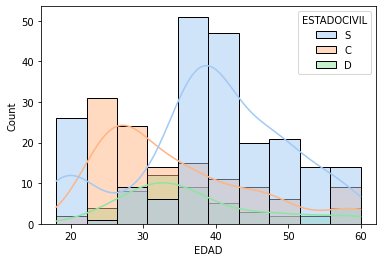

In [16]:
# https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

sb.histplot(data = compra, x = 'EDAD', kde = True, hue = 'ESTADOCIVIL', palette = 'pastel')

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

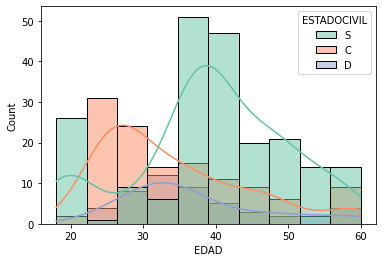

In [17]:
sb.histplot(data = compra, x = 'EDAD', kde = True, hue = 'ESTADOCIVIL', palette = 'Set2')

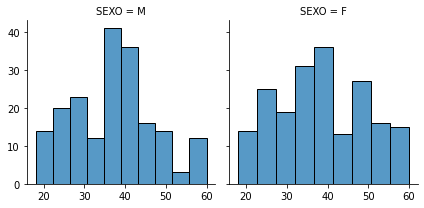

In [18]:
g = sb.FacetGrid(data = compra, col = "SEXO")
g.map_dataframe(sb.histplot, x = "EDAD")

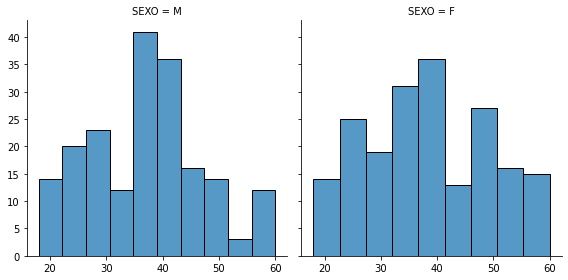

In [23]:
g = sb.FacetGrid(data = compra, col = "SEXO", height = 4, aspect = 1)
g.map_dataframe(sb.histplot, x = "EDAD")

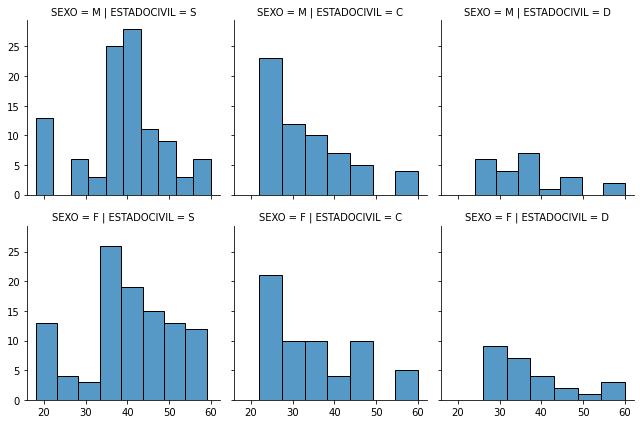

In [24]:
g = sb.FacetGrid(data = compra, col = "ESTADOCIVIL", row = 'SEXO')
g.map_dataframe(sb.histplot, x = "EDAD")

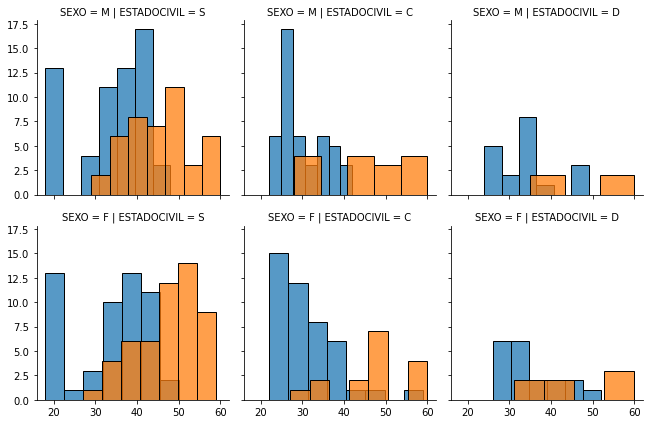

In [25]:
g = sb.FacetGrid(data = compra, col = "ESTADOCIVIL", row = 'SEXO', hue = 'FLAG_COMPRA')
g.map_dataframe(sb.histplot, x = "EDAD")

## Distribución: diagrama de caja (boxplot)

<AxesSubplot:ylabel='INGRESOS'>

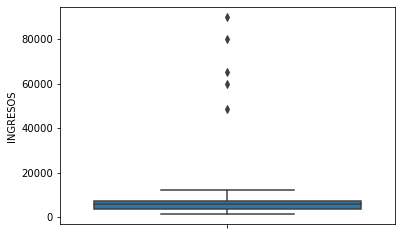

In [26]:
sb.boxplot(y=compra["INGRESOS"])

<AxesSubplot:xlabel='SEXO', ylabel='INGRESOS'>

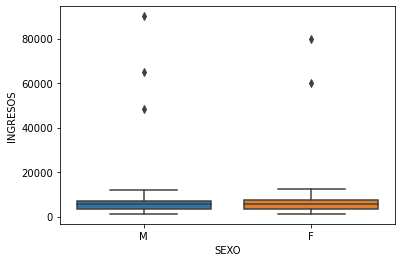

In [27]:
sb.boxplot(x = 'SEXO', y = 'INGRESOS', data = compra)

<AxesSubplot:ylabel='INGRESOS'>

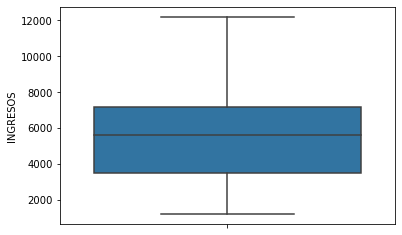

In [28]:
compra_s1 = compra[compra['INGRESOS'] < 40000]

sb.boxplot(y=compra_s1['INGRESOS'])

<AxesSubplot:ylabel='INGRESOS'>

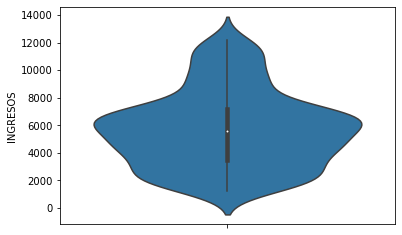

In [29]:
sb.violinplot(y=compra_s1['INGRESOS'])

<AxesSubplot:ylabel='INGRESOS'>

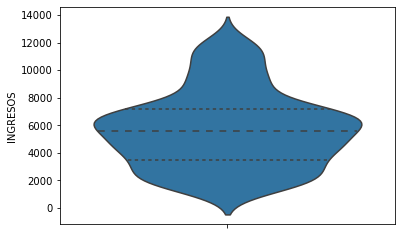

In [30]:
sb.violinplot(y=compra_s1['INGRESOS'], inner="quart")

<AxesSubplot:xlabel='SEXO', ylabel='INGRESOS'>

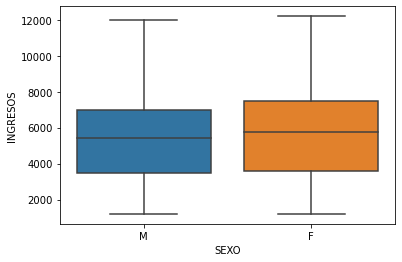

In [31]:
sb.boxplot(x = 'SEXO', y = 'INGRESOS', data = compra_s1)

<AxesSubplot:xlabel='SEXO', ylabel='INGRESOS'>

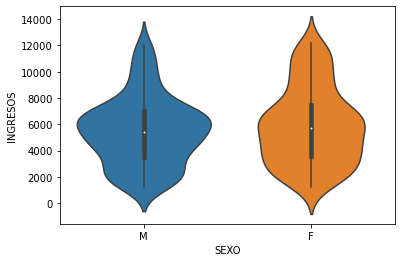

In [32]:
sb.violinplot(x = 'SEXO', y = 'INGRESOS', data = compra_s1)

C:\Users\caleb.terrel\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


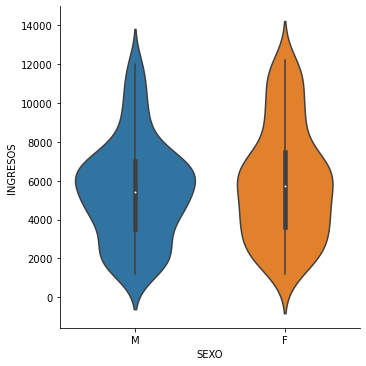

In [33]:
# otra forma de obtener violinplot

sb.factorplot(x = 'SEXO', y = 'INGRESOS', kind = 'violin', data = compra_s1)

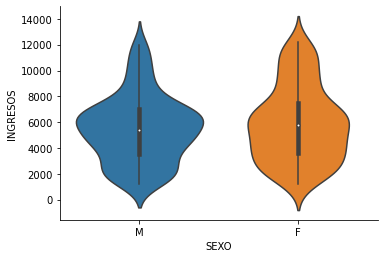

In [34]:
# otra forma de obtener violinplot

sb.catplot(x = 'SEXO', y = 'INGRESOS', kind = 'violin', data = compra_s1, height=3.5, aspect=1.5)

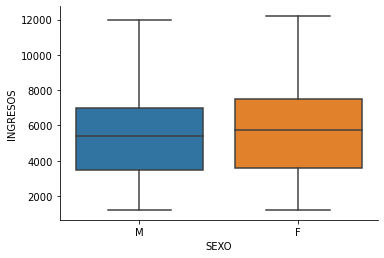

In [35]:
# otra forma de obtener boxplot
    
sb.catplot(x = 'SEXO', y = 'INGRESOS', kind = 'box', data = compra_s1, height=3.5, aspect=1.5)

<AxesSubplot:xlabel='SEXO', ylabel='INGRESOS'>

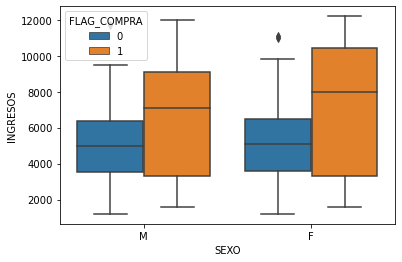

In [36]:
sb.boxplot(x = 'SEXO', y = 'INGRESOS', hue = 'FLAG_COMPRA', data = compra_s1)

<AxesSubplot:xlabel='SEXO', ylabel='INGRESOS'>

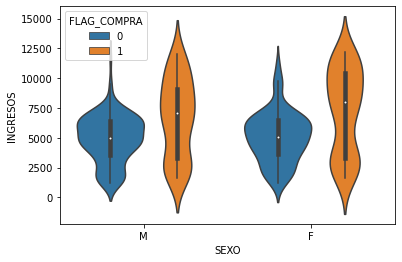

In [37]:
sb.violinplot(x = 'SEXO', y = 'INGRESOS', hue = 'FLAG_COMPRA', data = compra_s1)

<AxesSubplot:xlabel='SEXO', ylabel='INGRESOS'>

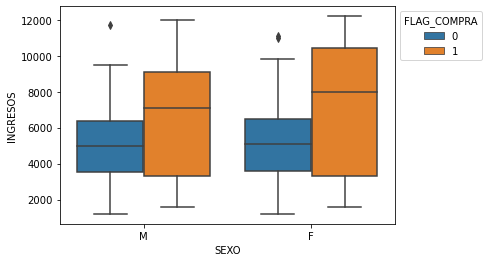

In [38]:
sb.boxplot(x = 'SEXO', y = 'INGRESOS', hue = 'FLAG_COMPRA', data = compra_s1)
plt.legend(bbox_to_anchor=(1, 1), title='FLAG_COMPRA')

<AxesSubplot:xlabel='INGRESOS', ylabel='SEXO'>

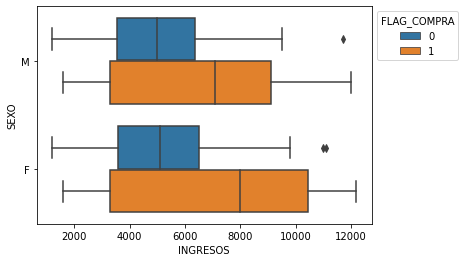

In [39]:
sb.boxplot(x = 'INGRESOS', y = 'SEXO', hue = 'FLAG_COMPRA', data = compra_s1, orient="h")
plt.legend(bbox_to_anchor=(1, 1), title='FLAG_COMPRA')

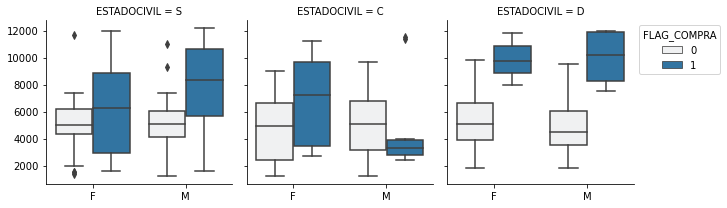

In [40]:
g = sb.FacetGrid(data = compra_s1, col = "ESTADOCIVIL")
g.map_dataframe(sb.boxplot, x = 'SEXO', y = 'INGRESOS', hue = 'FLAG_COMPRA')
plt.legend(bbox_to_anchor=(1, 1), title='FLAG_COMPRA')

## Relación: grafico de dispersión

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

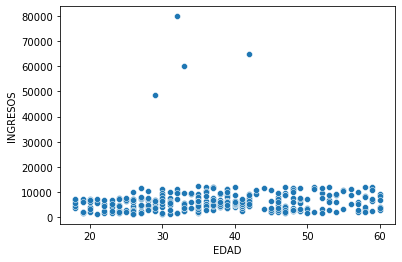

In [41]:
sb.scatterplot(x="EDAD", y="INGRESOS", data=compra)

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

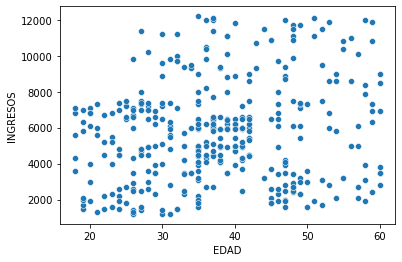

In [42]:
sb.scatterplot(x="EDAD", y="INGRESOS", data=compra_s1)

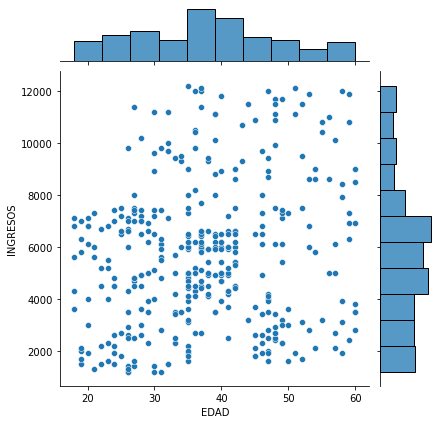

In [43]:
sb.jointplot(data=compra_s1, x="EDAD", y="INGRESOS")

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

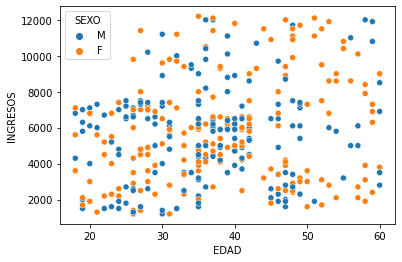

In [44]:
sb.scatterplot(x="EDAD", y="INGRESOS", hue = 'SEXO', data=compra_s1)

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

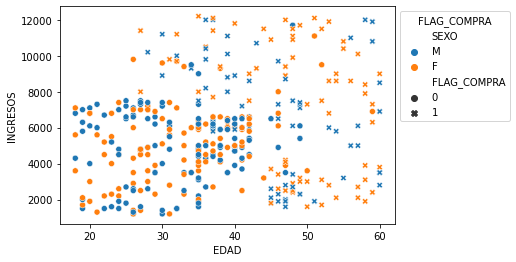

In [45]:
sb.scatterplot(x="EDAD", y="INGRESOS", hue = 'SEXO', style = 'FLAG_COMPRA', data=compra_s1)
plt.legend(bbox_to_anchor=(1, 1), title='FLAG_COMPRA')

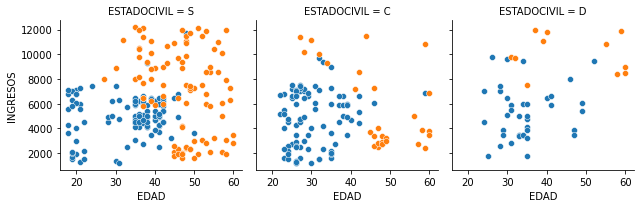

In [46]:
g = sb.FacetGrid(data = compra_s1, col = "ESTADOCIVIL", hue = 'FLAG_COMPRA')
g.map(sb.scatterplot, 'EDAD', 'INGRESOS')

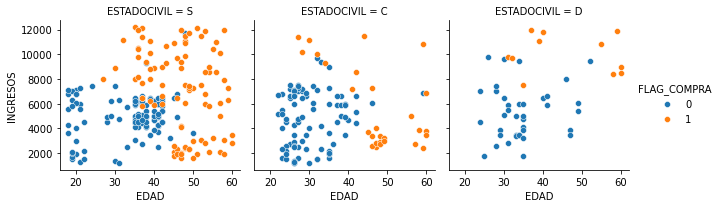

In [47]:
# MAS FACIL PARA Q SE VEAN LAS ETIQUETAS EN EJE X E Y

g = sb.FacetGrid(data = compra_s1, col = "ESTADOCIVIL", hue = 'FLAG_COMPRA')
g.map(sb.scatterplot, 'EDAD', 'INGRESOS').add_legend()

## *Relación: grafico de dispersión + recta de regresión*

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

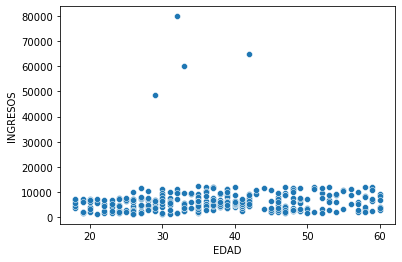

In [48]:
sb.scatterplot(x="EDAD", y="INGRESOS", data=compra)

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

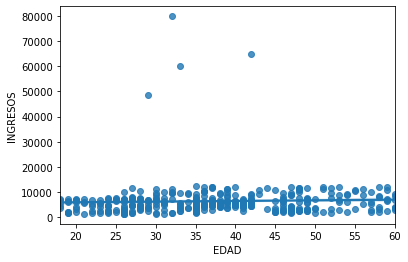

In [49]:
#plt.rcParams['figure.figsize'] = (6.4,4.8)
sb.regplot(x='EDAD', y='INGRESOS', data=compra)

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

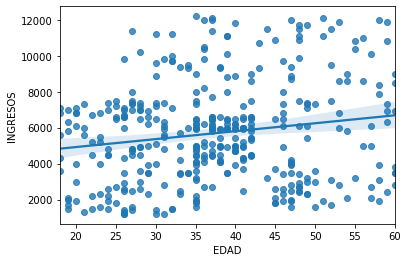

In [50]:
sb.regplot(x='EDAD', y='INGRESOS', data=compra_s1)

<AxesSubplot:xlabel='EDAD', ylabel='INGRESOS'>

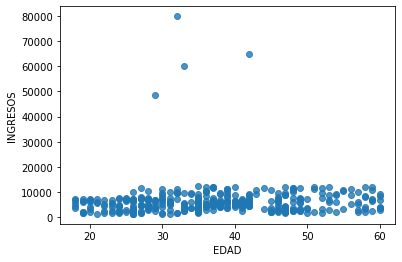

In [51]:
sb.regplot(x='EDAD', y='INGRESOS', fit_reg=False, data=compra)

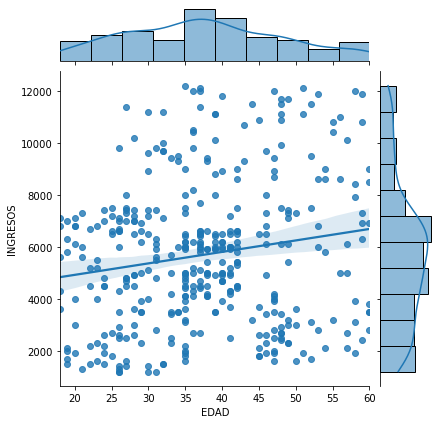

In [52]:
sb.jointplot(data=compra_s1, x="EDAD", y="INGRESOS",  kind="reg")

In [ ]:
# sb.regplot(x='EDAD', y='INGRESOS', data=compra_s1, hue='SEXO')
# NO FUNCIONA, hue SOLO FUNCIONA EN lmplot

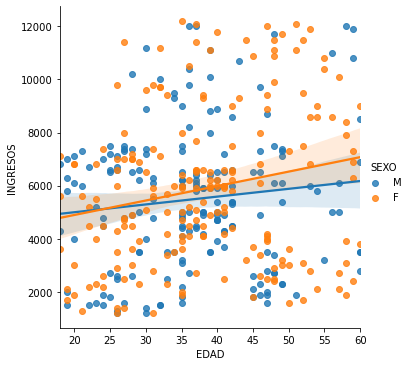

In [53]:
sb.lmplot(x='EDAD', y='INGRESOS', hue='SEXO', data=compra_s1)

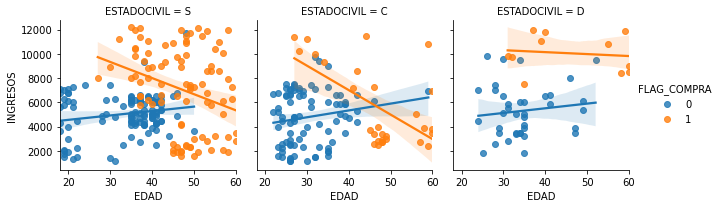

In [54]:
g = sb.FacetGrid(data = compra_s1, col = "ESTADOCIVIL", hue = 'FLAG_COMPRA')
g.map(sb.regplot, 'EDAD', 'INGRESOS').add_legend()

## Relación: matriz de dispersión

... el conjunto de datos Tips es una trama de datos con 244 filas y 7 variables que representa algunos datos de inflexión en el que un camarero registra información sobre cada propina que recibió durante un período de unos meses de trabajo en un restaurante. En total, el camarero registró 244 propinas. Los datos se informaron en una colección de estudios de casos de estadísticas comerciales (Bryant & Smith 1995). [4] El camarero recogió varias variables: la propina en dólares, la cuenta en dólares, el sexo del pagador de la cuenta, si había fumadores en la fiesta, el día de la semana, la hora del día y el tamaño. de la fiesta.


In [55]:
df = seaborn.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [57]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


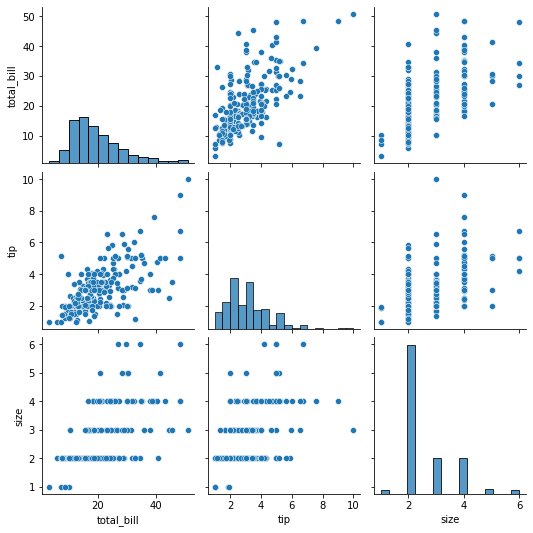

In [58]:
sb.pairplot(df)

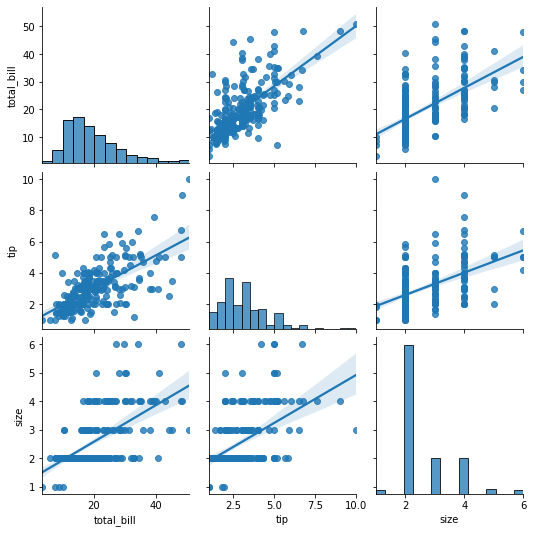

In [59]:
sb.pairplot(df, kind = 'reg')

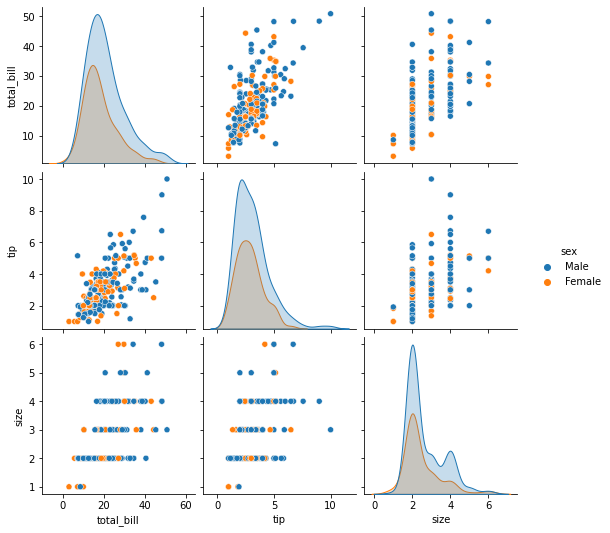

In [60]:
sb.pairplot(df, hue ='sex')

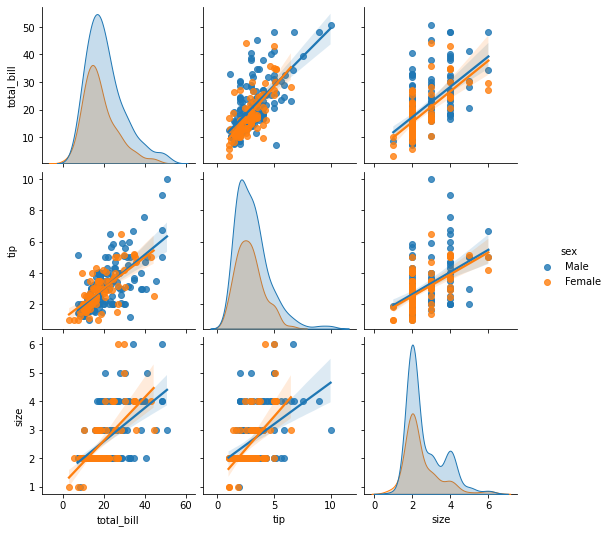

In [61]:
sb.pairplot(df, hue ='sex', kind = 'reg')

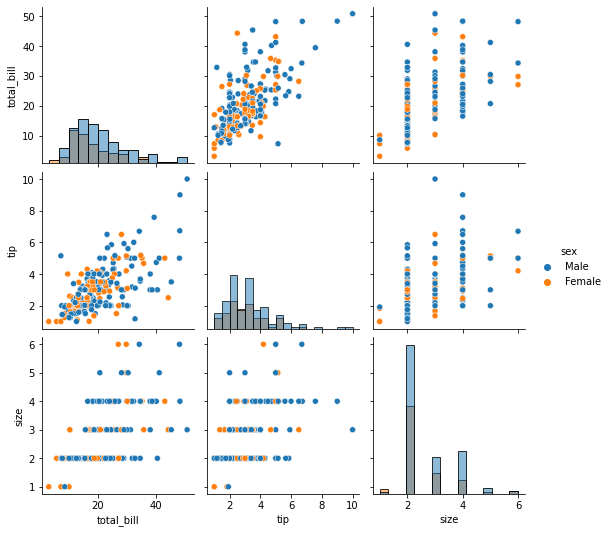

In [62]:
sb.pairplot(df, hue ='sex', diag_kind='hist')

## Comparación: gráfico de barras

In [63]:
pd.DataFrame(compra[['SEXO','EDAD']].groupby(by=['SEXO'])['EDAD'].mean())

,EDAD
SEXO,
F,38.280612
M,36.879581


<AxesSubplot:xlabel='SEXO', ylabel='EDAD'>

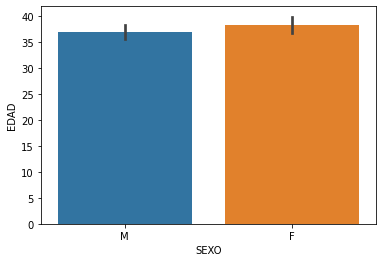

In [64]:
# Un diagrama de barras representa una estimación de la tendencia central de una variable numérica con la altura de cada 
# rectángulo y proporciona alguna indicación de la incertidumbre en torno a esa estimación mediante el uso de barras de error. 

sb.barplot(x = 'SEXO', y = 'EDAD', data = compra)

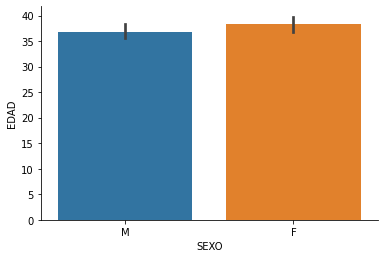

In [65]:
# otra forma de obtener barplot

sb.catplot(x="SEXO", y="EDAD", data=compra, kind="bar", height=3.5, aspect=1.5)

<AxesSubplot:xlabel='SEXO', ylabel='EDAD'>

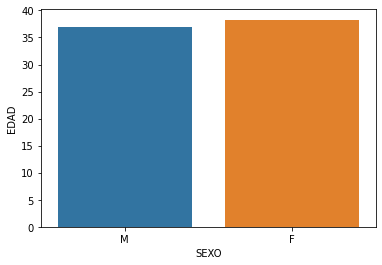

In [66]:
sb.barplot(x = 'SEXO', y = 'EDAD', data = compra, ci = None)

<AxesSubplot:xlabel='EDAD', ylabel='SEXO'>

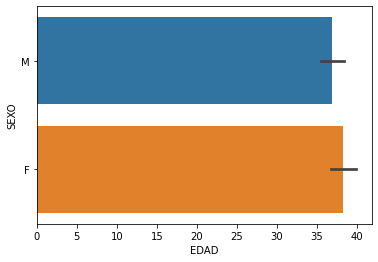

In [67]:
sb.barplot(x = 'EDAD', y = 'SEXO', data = compra)

<AxesSubplot:xlabel='SEXO', ylabel='EDAD'>

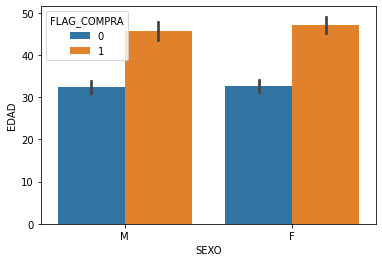

In [68]:
sb.barplot(x = 'SEXO', y = 'EDAD', hue = 'FLAG_COMPRA',data = compra)

In [69]:
pd.DataFrame(compra[['SEXO','EDAD', 'FLAG_COMPRA']].groupby(by=['SEXO', 'FLAG_COMPRA'])['EDAD'].median())

EDAD
SEXO FLAG_COMPRA      
F    0            33.0
     1            48.0
M    0            35.0
     1            46.0

<AxesSubplot:xlabel='SEXO', ylabel='EDAD'>

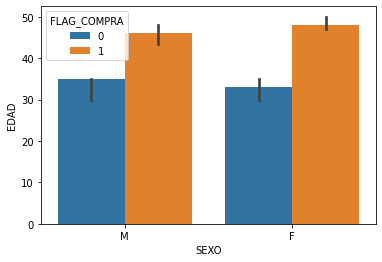

In [70]:
from numpy import median

sb.barplot(x = 'SEXO', y = 'EDAD', hue = 'FLAG_COMPRA', data = compra, estimator=median)

In [71]:
pd.DataFrame(compra[['ESTADOCIVIL','EDAD']].groupby(by=['ESTADOCIVIL'])['EDAD'].mean())

,EDAD
ESTADOCIVIL,
C,34.330579
D,37.183673
S,39.545455


<AxesSubplot:xlabel='ESTADOCIVIL', ylabel='EDAD'>

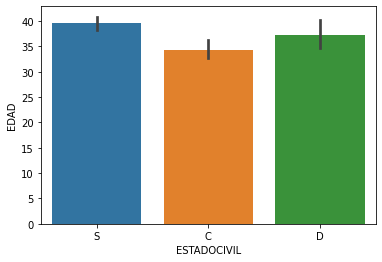

In [72]:
sb.barplot(x = 'ESTADOCIVIL', y = 'EDAD', data = compra)

<AxesSubplot:xlabel='ESTADOCIVIL', ylabel='EDAD'>

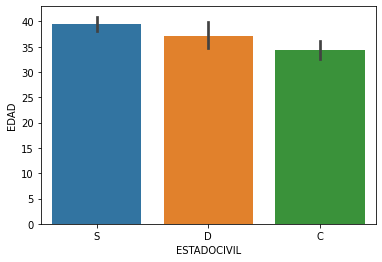

In [73]:
sb.barplot(x = 'ESTADOCIVIL', y = 'EDAD', data = compra, order = ['S', 'D', 'C'])

In [74]:
compra2 = pd.DataFrame(compra[['ESTADOCIVIL','EDAD']].groupby(by=['ESTADOCIVIL'], as_index = False)['EDAD'].mean())
compra2
type(compra2)

,ESTADOCIVIL,EDAD
0,C,34.330579
1,D,37.183673
2,S,39.545455


pandas.core.frame.DataFrame

<AxesSubplot:xlabel='ESTADOCIVIL', ylabel='EDAD'>

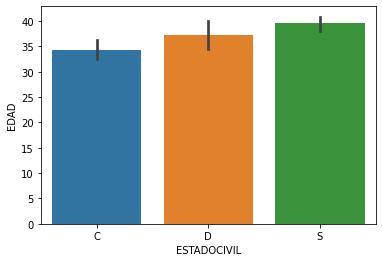

In [75]:
sb.barplot(x = 'ESTADOCIVIL', y = 'EDAD', data = compra, order = compra2.sort_values('EDAD').ESTADOCIVIL)

<AxesSubplot:xlabel='ESTADOCIVIL', ylabel='EDAD'>

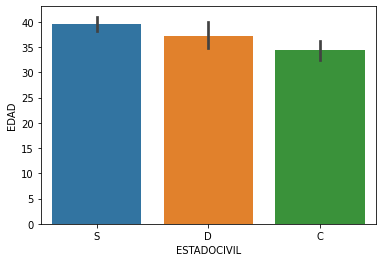

In [76]:
sb.barplot(x = 'ESTADOCIVIL', y = 'EDAD', data = compra, order = compra2.sort_values('EDAD',ascending = False).ESTADOCIVIL)

In [77]:
pd.DataFrame(compra[['ESTADOCIVIL','EDAD', "FLAG_COMPRA", 'SEXO']].groupby(by=['ESTADOCIVIL', "FLAG_COMPRA", 'SEXO'],
                                                                           as_index = False)['EDAD'].mean())

,ESTADOCIVIL,FLAG_COMPRA,SEXO,EDAD
0,C,0,F,30.704545
1,C,0,M,29.934783
2,C,1,F,46.687500
3,C,1,M,45.266667
4,D,0,F,35.052632
5,D,0,M,34.210526
6,D,1,F,45.000000
7,D,1,M,47.750000
8,S,0,F,33.415094
9,S,0,M,33.901639


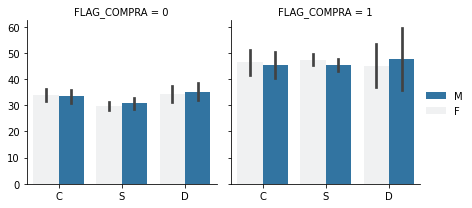

In [78]:
g = sb.FacetGrid(data = compra, col = "FLAG_COMPRA")
g.map_dataframe(sb.barplot, x = 'ESTADOCIVIL', y = 'EDAD', hue = 'SEXO').add_legend()

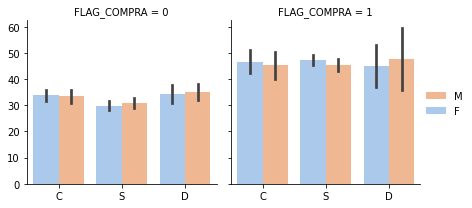

In [79]:
g = sb.FacetGrid(data = compra, col = "FLAG_COMPRA")
g.map_dataframe(sb.barplot, x = 'ESTADOCIVIL', y = 'EDAD', hue = 'SEXO', palette = 'pastel').add_legend()

In [80]:
compra['SEXO'].value_counts()

F    204
M    196
Name: SEXO, dtype: int64

<AxesSubplot:xlabel='SEXO', ylabel='count'>

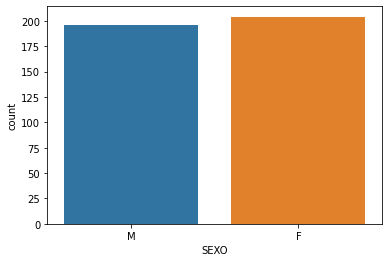

In [81]:
sb.countplot(x="SEXO", data=compra)

<AxesSubplot:xlabel='count', ylabel='SEXO'>

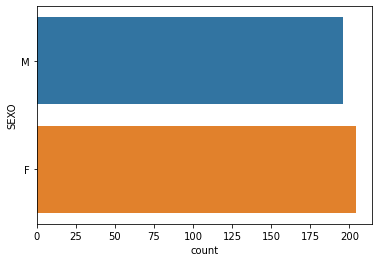

In [82]:
sb.countplot(y="SEXO", data=compra)

In [83]:
pd.crosstab(compra['SEXO'], compra['ESTADOCIVIL'])

ESTADOCIVIL,C,D,S
SEXO,,,
F,62,29,108
M,63,24,106


<AxesSubplot:xlabel='SEXO', ylabel='count'>

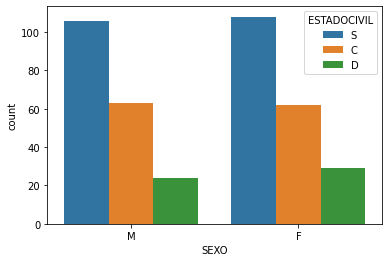

In [84]:
sb.countplot(x="SEXO", hue="ESTADOCIVIL", data=compra)

<AxesSubplot:xlabel='count', ylabel='SEXO'>

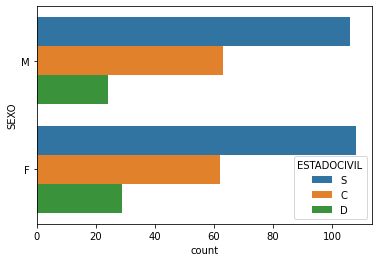

In [85]:
sb.countplot(y="SEXO", hue="ESTADOCIVIL", data=compra)

In [86]:
pd.crosstab(index = [compra['SEXO'],compra['ESTADOCIVIL']], columns = compra['FLAG_COMPRA'])

FLAG_COMPRA        0   1
SEXO ESTADOCIVIL        
F    C            46  16
     D            21   8
     S            56  52
M    C            48  15
     D            19   5
     S            62  44

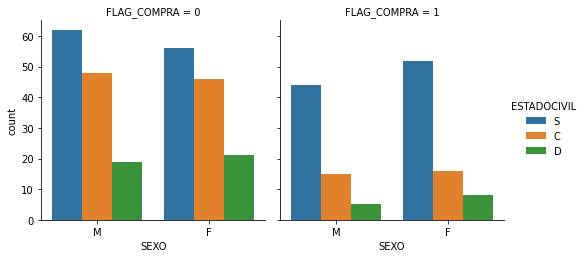

In [87]:
# otra forma de obtener countplot

sb.catplot(x="SEXO", hue="ESTADOCIVIL", col="FLAG_COMPRA", data=compra, kind="count", height=3.5, aspect=1)

## Comparación: Mapa de calor

In [88]:
data1 = compra.groupby(by=['ESTADOCIVIL', "FLAG_COMPRA"])['EDAD'].mean().unstack()
data1

FLAG_COMPRA,0,1
ESTADOCIVIL,,
C,30.311111,46.000000
D,34.631579,46.000000
S,33.675439,46.589474


<AxesSubplot:xlabel='FLAG_COMPRA', ylabel='ESTADOCIVIL'>

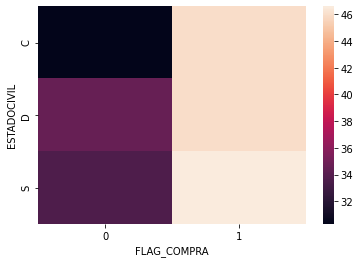

In [89]:
sb.heatmap(data = data1)

<AxesSubplot:xlabel='FLAG_COMPRA', ylabel='ESTADOCIVIL'>

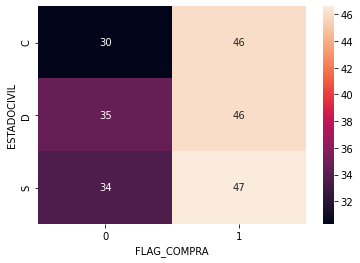

In [90]:
sb.heatmap(data = data1, annot = True)

<AxesSubplot:xlabel='FLAG_COMPRA', ylabel='ESTADOCIVIL'>

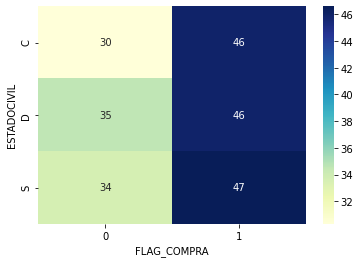

In [91]:
sb.heatmap(data = data1, annot = True, cmap="YlGnBu")

<AxesSubplot:xlabel='FLAG_COMPRA', ylabel='ESTADOCIVIL'>

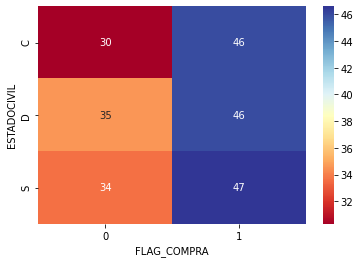

In [92]:
sb.heatmap(data = data1, annot = True, cmap="RdYlBu")

## Comparación: tendencias

In [93]:
df = pd.DataFrame({'Date': ['2019-10-01', '2019-11-01', 
                            '2019-12-01','2020-01-01', 
                            '2020-02-01', '2020-03-01',
                            '2020-04-01', '2020-05-01', 
                            '2020-06-01'],
                     
                   'Col_1': [34, 43, 14, 15, 15,
                             14, 31, 25, 62],
                     
                   'Col_2': [52, 66, 78, 15, 15,
                             5, 25, 25, 86],
                     
                   'Col_3': [13, 73, 82, 58, 52,
                             87, 26, 5, 56],
                   'Col_4': [44, 75, 26, 15, 15,
                             14, 54, 25, 24]})
df

,Date,Col_1,Col_2,Col_3,Col_4
0,2019-10-01,34,52,13,44
1,2019-11-01,43,66,73,75
2,2019-12-01,14,78,82,26
3,2020-01-01,15,15,58,15
4,2020-02-01,15,15,52,15
5,2020-03-01,14,5,87,14
6,2020-04-01,31,25,26,54
7,2020-05-01,25,25,5,25
8,2020-06-01,62,86,56,24


<AxesSubplot:xlabel='Date', ylabel='Col_1'>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

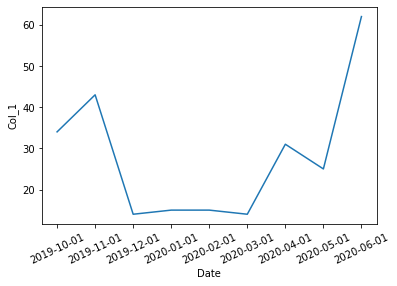

In [95]:
sb.lineplot(x = "Date", y = "Col_1", data = df)
plt.xticks(rotation = 25)

<AxesSubplot:xlabel='Date', ylabel='Col_1'>

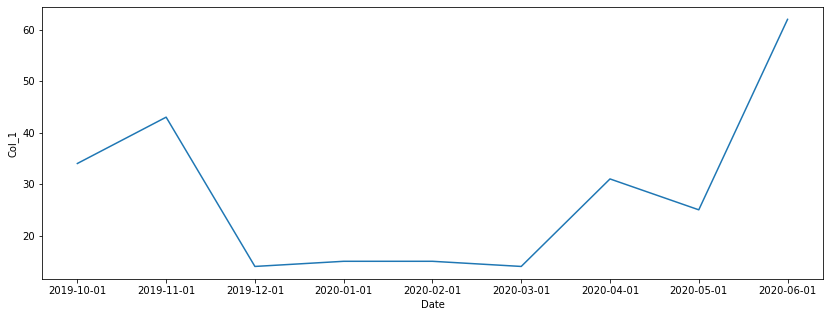

In [98]:
# plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams['figure.figsize'] = (14, 5)

sb.lineplot(x = "Date", y = "Col_1", data = df)

<AxesSubplot:xlabel='Date', ylabel='Col_1'>

<AxesSubplot:xlabel='Date', ylabel='Col_1'>

Text(0, 0.5, 'col')

Text(0.5, 1.0, 'Tendencias')

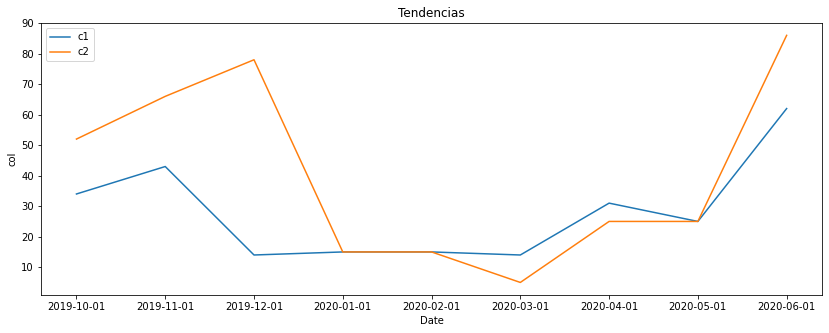

In [99]:
sb.lineplot(x = "Date", y = "Col_1", data = df, label = 'c1')
sb.lineplot(x = "Date", y = "Col_2", data = df, label = 'c2')
plt.ylabel('col')
plt.title('Tendencias')

In [ ]:
# !pip install pandas-datareader

In [101]:
from pandas_datareader import data

In [102]:
# cotizaciones diarias
# https://pandas-datareader.readthedocs.io/en/latest/
# https://www.datasource.ai/uploads/026d8d16ea1e8f4698e716f66e4aa264.html

# Apple - APPL
# Google - GOOGL
# Tesla - TSLA
# Microsoft - 'MSFT'

goog = data.DataReader('GOOGL', start='2010', end='2021', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908488.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003391.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949443.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815771.0,297.347351
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439151.0,301.311310


In [103]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,1742.410034,1724.349976,1729.000000,1734.160034,465600.0,1734.160034
2020-12-28,1787.000000,1741.819946,1744.910034,1773.959961,1382500.0,1773.959961
2020-12-29,1788.469971,1755.109985,1787.229980,1757.760010,986300.0,1757.760010
2020-12-30,1767.760010,1728.000000,1765.000000,1736.250000,1051300.0,1736.250000
2020-12-31,1757.500000,1736.089966,1737.270020,1752.640015,1053500.0,1752.640015


<AxesSubplot:xlabel='Date'>

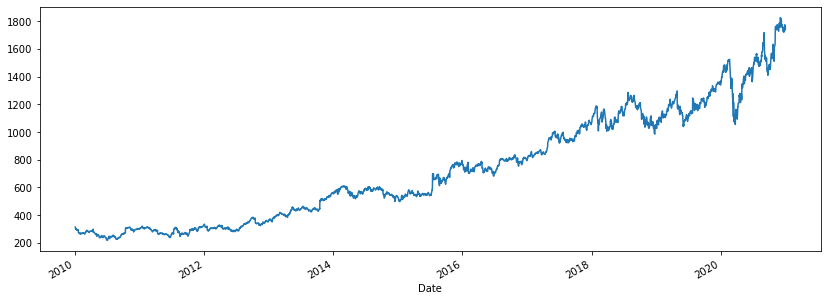

In [104]:
goog['Close'].plot()

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

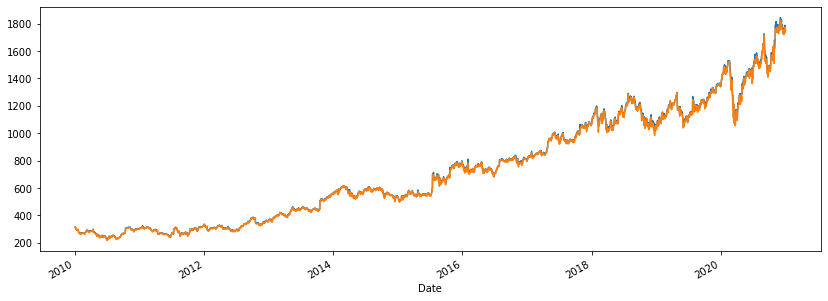

In [105]:
goog['High'].plot()
goog['Close'].plot()

In [106]:
births = pd.read_csv('births.csv')
births.head()
births.tail()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [107]:
df = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')
df.head()
df.tail()
#plt.ylabel('total births per year');

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


gender,F,M
year,,
2004,2010710,2108197
2005,2022892,2122727
2006,2084957,2188268
2007,2111890,2212118
2008,2077929,2177227


<AxesSubplot:xlabel='year'>

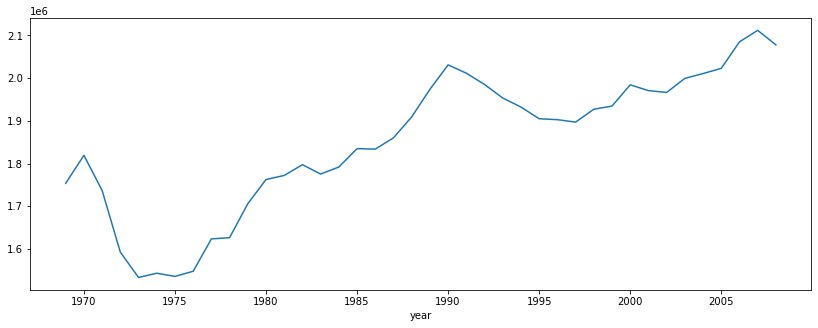

In [108]:
df['F'].plot()

<AxesSubplot:xlabel='year'>

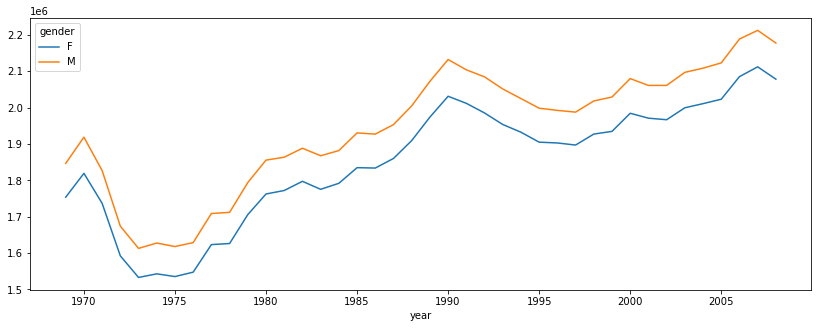

In [109]:
df.plot()
#plt.ylabel('total births per year')